# Constraining MAH in $\texttt{BORG}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from cache_to_disk import delete_disk_caches_for_function
from scipy.stats import norm
from scipy.signal import savgol_filter

from mah import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

## $\texttt{MDPL2}$ to $\texttt{CB2}$ MAH comparison

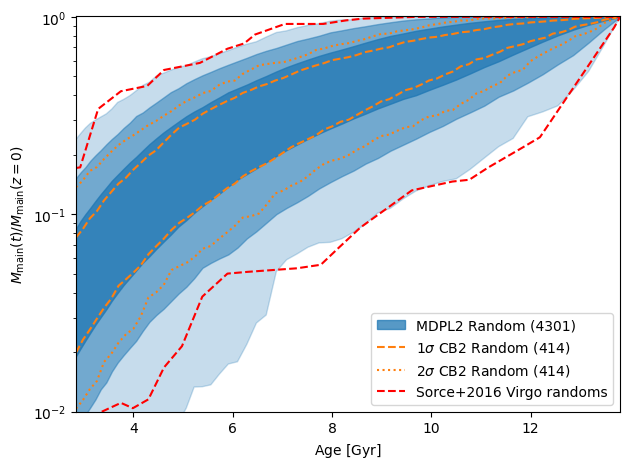

In [11]:
min_age = 2.8
pmin, pmax = 5, 95
bounds = [14.5, 14.7]
mass_norm = 10**np.mean(bounds)
alphas = {3: 0.25, 2: 0.5, 1: 0.75}
xrange_cb2, random_mah_cb2 = extract_mah("csiborg2_random", bounds, "MainProgenitorMass", min_age=2.8)
xrange_mdpl2, random_mah_mdpl2 = extract_mah_mdpl2(bounds, min_age=2.8)

random_mah_cb2 /= random_mah_cb2[:, -1].reshape(-1, 1)
random_mah_mdpl2 /= random_mah_mdpl2[:, -1].reshape(-1, 1)
# random_mah_cb2 /= mass_norm
# random_mah_mdpl2 /= mass_norm



plt.figure()
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
for n in [3, 2, 1]:
    pmin, pmax = norm.cdf(-n) * 100 , norm.cdf(n) * 100
    ylow, yhigh = np.percentile(random_mah_mdpl2, [pmin, pmax], axis=0)
    plt.fill_between(xrange_mdpl2, ylow, yhigh, alpha=alphas[n], color=cols[0],
                     facecolor=cols[0], label=f"MDPL2 Random ({len(random_mah_mdpl2)})" if n == 1 else None)


pmin, pmax = norm.cdf(-1) * 100 , norm.cdf(1) * 100
ylow, yhigh = np.percentile(random_mah_cb2, [pmin, pmax], axis=0)
plt.plot(xrange_cb2, ylow, c=cols[1], ls="--", label=rf"$1\sigma$ CB2 Random ({len(random_mah_cb2)})", zorder=1)
plt.plot(xrange_cb2, yhigh, c=cols[1], ls="--", zorder=1)

pmin, pmax = norm.cdf(-2) * 100 , norm.cdf(2) * 100
ylow, yhigh = np.percentile(random_mah_cb2, [pmin, pmax], axis=0)
plt.plot(xrange_cb2, ylow, c=cols[1], ls="dotted", label=rf"$2\sigma$ CB2 Random ({len(random_mah_cb2)})", zorder=1)
plt.plot(xrange_cb2, yhigh, c=cols[1], ls="dotted", zorder=1)

# plt.fill_between(xrange_mdpl2,
#                  np.ones_like(xrange_mdpl2) * 10**bounds[0] / mass_norm,
#                  np.ones_like(xrange_mdpl2) * 10**bounds[1] / mass_norm, alpha=0.25,
#                  label=r"$z = 0$ selection", color="gray", zorder=0,
#                  hatch="///")

# They appear to be plotting the min-max
plt.plot(RANDOM_MAH_Sorce_Virgo_UPPER[:, 0],
         RANDOM_MAH_Sorce_Virgo_UPPER[:, 1], c="red", ls="--", label="Sorce+2016 Virgo randoms")
plt.plot(RANDOM_MAH_SORCE_Virgo_LOWER[:, 0],
         RANDOM_MAH_SORCE_Virgo_LOWER[:, 1], c="red", ls="--")


plt.yscale("log")
plt.legend(loc="lower right")
plt.xlabel(r"$\mathrm{Age} ~ [\mathrm{Gyr}]$")
plt.ylabel(r"$M_{\rm main}(t) / M_{\rm main}(z = 0)$")
plt.xlim(xrange_mdpl2.min(), xrange_mdpl2.max())
plt.ylim(1e-2, 1.01)

plt.tight_layout()
plt.savefig("../../plots/MAH_MDPL2_CB2_comparison_VIRGO.png", dpi=450)
plt.show()

## MAH of specific clusters in $\texttt{CB}$

### Summary plot

In [2]:
nsim0 = 17417
simname = "csiborg2_main"
min_logmass = 12.25
delete_cache = False

if delete_cache:
    delete_disk_caches_for_function("load_data")
cat0, catxs, merger_trees, overlaps = load_data(nsim0, simname, min_logmass)
nsimxs = [cat.nsim for cat in catxs]

In [32]:
catx = cat0

In [35]:
pos = catx["spherical_pos"]

ra, dec = pos[:, 1], pos[:, 2]
l, b = csiborgtools.flow.radec_to_galactic(pos[:, 1], pos[:, 2])

In [36]:
50 / 0.705

70.92198581560284

In [45]:
113 * 0.705

79.66499999999999

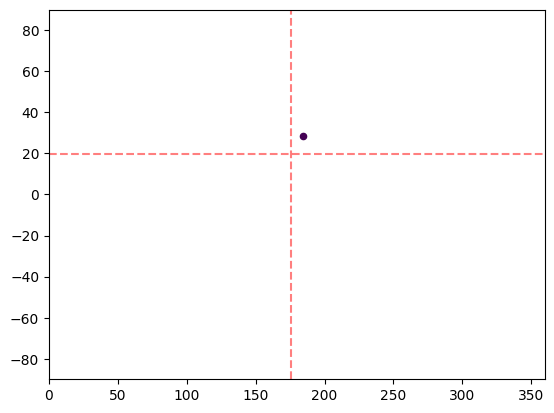

In [61]:
mask = (pos[:, 0] > 83.5) & (catx["totmass"] > 1e14) & (pos[:, 0] < 84) & (catx["totmass"] < 4e14)

plt.figure()
plt.scatter(ra[mask], dec[mask], s=20, c=np.log10(catx["totmass"][mask]))
plt.axvline(csiborgtools.hms_to_degrees(11, 44), zorder=0, ls="--", color="red", alpha=0.5)
plt.axhline(csiborgtools.dms_to_degrees(19, 45), zorder=0, ls="--", color="red", alpha=0.5)
# plt.axvline(285, zorder=0)
# plt.axhline(74, zorder=0)
plt.xlim(0, 360,)
plt.ylim(-90, 90)
plt.show()

In [62]:
cat0["totmass"][mask], cat0["dist"][mask], pos[:, 1][mask], cat0["index"][mask]

(array([1.1764427e+14], dtype=float32),
 array([83.93529855]),
 array([184.62410722]),
 array([315], dtype=int32))

In [120]:
mask = (cat0["dist"] < 100) & (cat0["totmass"] > 2e14)
mask.sum()

24

In [121]:
cat0["totmass"][mask], cat0["index"][mask]

(array([1.3149970e+15, 4.9394832e+14, 3.9707187e+14, 3.6969589e+14,
        3.5838989e+14, 3.4054645e+14, 3.2880589e+14, 3.2858516e+14,
        3.1561675e+14, 3.0209864e+14, 2.9957615e+14, 2.9370144e+14,
        2.8257113e+14, 2.7131389e+14, 2.5883651e+14, 2.5817466e+14,
        2.3839617e+14, 2.3532438e+14, 2.2714606e+14, 2.2489048e+14,
        2.1780584e+14, 2.1020473e+14, 2.1004685e+14, 2.0899980e+14],
       dtype=float32),
 array([  2,  23,  31,  38,  39,  44,  49,  50,  56,  62,  65,  66,  69,
         75,  82,  83,  97, 100, 108, 109, 114, 122, 124, 125], dtype=int32))

In [133]:
overlaps.max_overlap(0, True)[108]

array([0.25819606, 0.43737528, 0.51124454, 0.46384627, 0.26452401,
       0.32776746, 0.3836844 , 0.56561893, 0.22747411, 0.57970226,
       0.19699863, 0.55168611, 0.38103878, 0.19168761, 0.34359506,
       0.39914343, 0.74848348, 0.65658271, 0.61172086])

In [135]:
data = extract_main_progenitor_maxoverlap(108, overlaps, merger_trees)

Cross main progenitors:   0%|          | 0/19 [00:00<?, ?it/s]

Cross main progenitors: 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]


Appending main progenitor for 17417.


In [136]:
logmp = np.log10(np.array([data[nsim]["MainProgenitorMass"][0] for nsim in data.keys()]))

mean, std = np.mean(logmp), np.std(logmp)
print(f"mean = {mean:.4f}, std = {std:.4f}")

bounds = [mean - 1 * std, mean + 1 * std]

xrange_cb2, random_mah_cb2 = extract_mah("csiborg2_random", bounds, "MainProgenitorMass", min_age=2.8)
xrange_mdpl2, random_mah_mdpl2 = extract_mah_mdpl2(bounds, min_age=2.8)

print(f"Found {len(random_mah_cb2)} haloes in CB2 random.")
print(f"Found {len(random_mah_mdpl2)} haloes in MDPL2.")

age, mah = summarize_extracted_mah(simname, data, nsim0, nsimxs, "MainProgenitorMass", min_age=2.8)


random_mah_cb2 /= random_mah_cb2[:, -1].reshape(-1, 1)
random_mah_mdpl2 /= random_mah_mdpl2[:, -1].reshape(-1, 1)
mah /= mah[:, -1].reshape(-1, 1)

mean = 14.2311, std = 0.1513
Found 2629 haloes in CB2 random.
Found 18572 haloes in MDPL2.


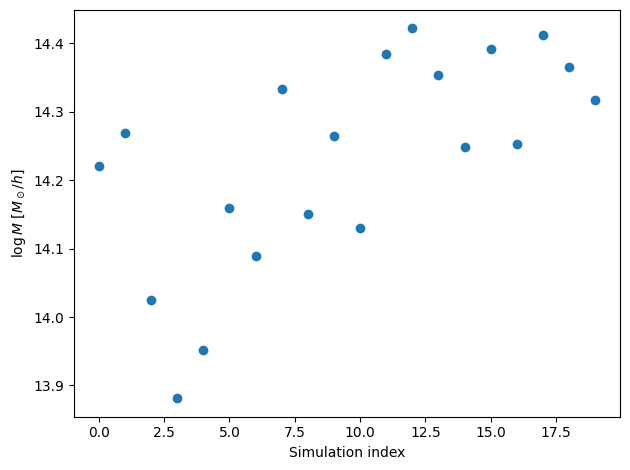

In [137]:
plt.figure()
# plt.hist(logmp, bins="auto")
plt.scatter(np.arange(len(logmp)), logmp)
plt.xlabel("Simulation index")
plt.ylabel(r"$\log M ~ [M_\odot / h]$")
# plt.axhline(mean, c="red", ls="--")
plt.tight_layout()
plt.savefig("../../plots/COMA_MASS.png", dpi=450)
plt.show()

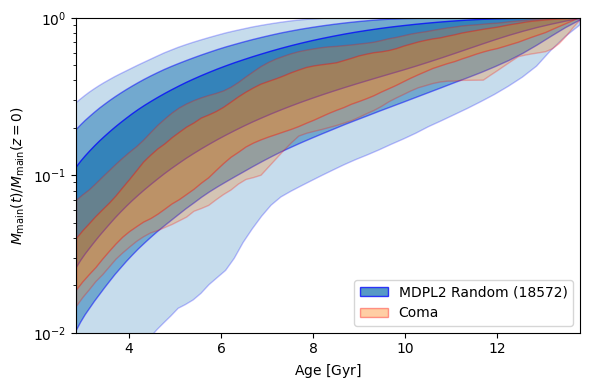

In [138]:
pmin, pmax = 0.15, 100 - 0.15
# norm_mass = 10**np.nanmean(np.log10(mah[:, -1]))
norm_mass = 1
alphas = {3: 0.25, 2: 0.5, 1: 0.75}


plt.figure(figsize=(6, 4))
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
lw = plt.rcParams["lines.linewidth"]

for n in [3, 2, 1]:
    pmin, pmax = norm.cdf(-n) * 100 , norm.cdf(n) * 100
    ylow, yhigh = np.percentile(random_mah_mdpl2 / norm_mass, [pmin, pmax], axis=0)

    ylow = savgol_filter(ylow, 5, 1, mode="interp")
    yhigh = savgol_filter(yhigh, 5, 1, mode="interp")
    plt.fill_between(xrange_mdpl2, ylow, yhigh, alpha=alphas[n], color=cols[0],
                     facecolor=cols[0], zorder=0, edgecolor="blue",
                     label=f"MDPL2 Random ({len(random_mah_mdpl2)})" if n == 1 else None)
    
    # pmin, pmax = norm.cdf(-n) * 100 , norm.cdf(n) * 100
    # ylow, yhigh = np.percentile(random_mah_cb2 / norm_mass, [pmin, pmax], axis=0)
    # ylow = savgol_filter(ylow, 5, 1, mode="interp")
    # yhigh = savgol_filter(yhigh, 5, 1, mode="interp")
    # plt.fill_between(xrange_cb2, ylow, yhigh, alpha=alphas[n], color=cols[0],
    #                  facecolor=cols[0], zorder=0, edgecolor="blue",
    #                  label=f"CB2 Random ({len(random_mah_cb2)})" if n == 1 else None)

    if n == 3:
        continue

    ylow, yhigh = np.percentile(mah / norm_mass, [pmin, pmax], axis=0)
    ylow = savgol_filter(ylow, 5, 1, mode="interp")
    yhigh = savgol_filter(yhigh, 5, 1, mode="interp")
    plt.fill_between(age, ylow, yhigh, alpha=alphas[n] / 2,
                     label="Coma" if n == 1 else None, zorder=1,
                     color=cols[1], edgecolor="red")

# pmin, pmax = norm.cdf(-1) * 100 , norm.cdf(1) * 100
# ylow, yhigh = np.percentile(random_mah_cb2 / norm_mass, [pmin, pmax], axis=0)
# plt.plot(xrange_cb2, ylow, c=cols[2], ls="--", lw=1.5 * lw,
#          label=rf"$1\sigma$ CB2 Random ({len(random_mah_cb2)})")
# plt.plot(xrange_cb2, yhigh, c=cols[2], ls="--", lw=1.5 * lw)

# for i in range(len(mah)):
    # plt.plot(age, mah[i] / norm_mass, c="black", lw=lw/4, alpha=0.5, zorder=4)

# plt.plot(RANDOM_MAH_Sorce_Virgo_UPPER[:, 0],
        #  RANDOM_MAH_Sorce_Virgo_UPPER[:, 1], c="red", ls="--", label="Sorce+2016 Virgo randoms")
# plt.plot(RANDOM_MAH_SORCE_Virgo_LOWER[:, 0],
        #  RANDOM_MAH_SORCE_Virgo_LOWER[:, 1], c="red", ls="--")



plt.yscale("log")
plt.legend(loc="lower right")

plt.xlabel(r"$\mathrm{Age} ~ [\mathrm{Gyr}]$")
plt.ylabel(r"$M_{\rm main}(t) / M_{\rm main}(z = 0)$")
plt.xlim(xrange_mdpl2.min(), xrange_mdpl2.max())
plt.ylim(0.01, 1)
plt.tight_layout()
# plt.savefig("../../plots/coma_MAIN.png")
plt.show()

/tmp/ipykernel_3803914/1215582327.py:31: RuntimeWarning: All-NaN slice encountered
  mu = np.nanmedian(random_mah, axis=0)


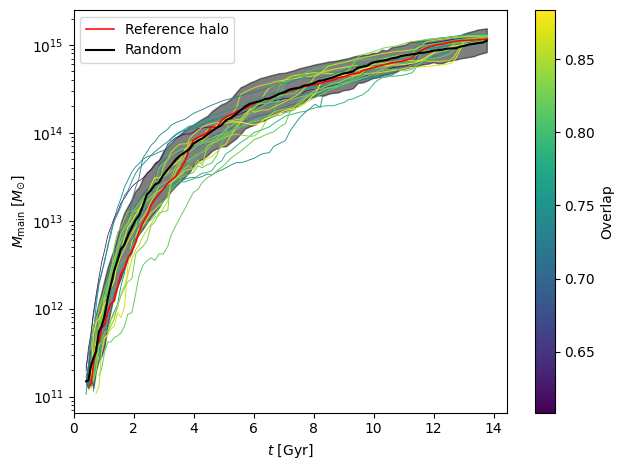

In [79]:

cmap = plt.cm.viridis

x = np.asarray([data[nsimx]["Overlap"] for nsimx in nsimxs if nsimx in data])
w = x - x.min()
w /= w.max()

norm = Normalize(vmin=x.min(), vmax=x.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(x)


fig, ax = plt.subplots()
lw = plt.rcParams["lines.linewidth"] / 2
d = data[nsim0]
ax.plot(d["Age"], d["MainProgenitorMass"], color="red", lw=1.5*lw,
        label="Reference halo", zorder=1)

i = 0
for nsimx in nsimxs:
    try:
        d = data[nsimx]
    except KeyError:
        continue

    ax.plot(d["Age"], d["MainProgenitorMass"], color=cmap(norm(x[i])),
            zorder=0, lw=lw * (x[i] / x.max()))

    i += 1


mu = np.nanmedian(random_mah, axis=0)
ymin = np.nanpercentile(random_mah, 16, axis=0)
ymax = np.nanpercentile(random_mah, 84, axis=0)
ax.plot(xrange, mu, color="black", label="Random")
ax.fill_between(xrange, ymin, ymax, color="black", alpha=0.5, zorder=-1)

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Overlap')

ax.legend()
ax.set_yscale("log")
ax.set_xlabel(r"$t ~ [\mathrm{Gyr}]$")
ax.set_ylabel(r"$M_{\rm main} ~ [M_{\odot}]$")
ax.set_xlim(0)
plt.tight_layout()
# plt.savefig("../../plots/example_mah.png")
fig.show()

In [136]:
nsim0 = 1
simname = "csiborg2_random"
kind = simname.split("_")[-1]
min_logmass = 12.25

# NOTE: These can possibly be pickled to avoid doing this long process every
# single time.

cat = csiborgtools.read.CSiBORG2Catalogue(
    nsim0, 99, kind, bounds={"totmass": (1e13, None), "dist": (0, 135)})
# merger_reader = csiborgtools.read.CSiBORG2MergerTreeReader(nsim0, kind)

In [149]:
a = np.array([0.01428571, 0.02424242, 0.03419913, 0.04415584, 0.05411255,
       0.06406926, 0.07402597, 0.08398268, 0.09393939, 0.1038961 ,
       0.11385281, 0.12380952, 0.13376623, 0.14372294, 0.15367965,
       0.16363636, 0.17359307, 0.18354978, 0.19350649, 0.2034632 ,
       0.21341991, 0.22337662, 0.23333333, 0.24329004, 0.25324675,
       0.26320346, 0.27316017, 0.28311688, 0.29307359, 0.3030303 ,
       0.31298701, 0.32294372, 0.33290043, 0.34285714, 0.35281385,
       0.36277056, 0.37272727, 0.38268398, 0.39264069, 0.4025974 ,
       0.41255411, 0.42251082, 0.43246753, 0.44242424, 0.45238095,
       0.46233766, 0.47229437, 0.48225108, 0.49220779, 0.5021645 ,
       0.51212121, 0.52207792, 0.53203463, 0.54199134, 0.55194805,
       0.56190476, 0.57186147, 0.58181818, 0.59177489, 0.6017316 ,
       0.61168831, 0.62164502, 0.63160173, 0.64155844, 0.65151515,
       0.66147186, 0.67142857, 0.68138528, 0.69134199, 0.7012987 ,
       0.71125541, 0.72121212, 0.73116883, 0.74112554, 0.75108225,
       0.76103896, 0.77099567, 0.78095238, 0.79090909, 0.8008658 ,
       0.81082251, 0.82077922, 0.83073593, 0.84069264, 0.85064935,
       0.86060606, 0.87056277, 0.88051948, 0.89047619, 0.9004329 ,
       0.91038961, 0.92034632, 0.93030303, 0.94025974, 0.95021645,
       0.96017316, 0.97012987, 0.98008658, 0.99004329, 1.        ])

In [155]:
from h5py import File

In [156]:
f = File("/mnt/extraspace/rstiskalek/csiborg_postprocessing/random_mah/random_mah_csiborg2_random_1.hdf5")

In [168]:
f["MainProgenitorMass"][0]

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan, 9.6507642e+10, 3.0197550e+11, 3.2376760e+11,
       7.0668498e+11, 7.7206113e+11, 9.3394495e+11, 1.5814801e+12,
       1.9799633e+12, 2.8672110e+12, 3.4369173e+12, 4.2152047e+12,
       4.0595470e+12, 6.7960056e+12, 8.0506048e+12, 9.8562317e+12,
       1.5811687e+13, 2.1929025e+13, 2.7361473e+13, 3.6311776e+13,
       4.0548774e+13, 4.6049712e+13, 5.1784131e+13, 5.8592594e+13,
       6.2322144e+13, 6.8669858e+13, 7.1316036e+13, 1.2149067e+14,
       1.4343837e+14, 1.5714247e+14, 1.6746878e+14, 1.8382215e+14,
       1.8707539e+14, 1.8938536e+14, 1.9296859e+14, 1.9942214e+14,
       2.0502892e+14, 2.0806736e+14, 2.1257209e+14, 2.3088363e+14,
       2.4707200e+14, 2.5878680e+14, 2.6422236e+14, 2.7754664e+14,
       2.8651874e+14, 2.9785370e+14, 3.0968989e+14, 3.1373079e

In [154]:
print(list(1 / a - 1))

[69.0000210000063, 40.250007218751264, 28.24050991940438, 21.6470609550175, 17.480001404480106, 14.608109099433955, 12.508772664512199, 10.90721705951751, 9.64516173673259, 8.625000360937513, 7.7832702592057235, 7.0769233254437935, 6.475728365821477, 5.95783150553419, 5.50704240932355, 5.111111246913583, 4.760598622974984, 4.448113312911626, 4.1677853285437605, 3.914893700679041, 3.685598452365574, 3.476744253718227, 3.285714346938776, 3.1103203402819117, 2.9487179993425383, 2.7993421515051513, 2.6608558268213116, 2.5321101306287352, 2.4121122957547967, 2.3000000330000008, 2.1950207773798662, 2.096514773533915, 2.003901196522936, 1.9166666909722223, 1.8343558508261513, 1.7565632668759008, 1.6829268488994646, 1.613122190273029, 1.5468577900064306, 1.4838709837669097, 1.4239244641145379, 1.366803292753544, 1.3123123255056859, 1.2602739849878026, 1.210526327423823, 1.162921359250726, 1.117323566656109, 1.0736086272735772, 1.0316622782422846, 0.9913793189283591, 0.9526627299814432, 0.91542

In [142]:
np.sum(cat["totmass"] > 5e14)

17

In [130]:
d1 = merger_reader.main_progenitor(10000)


In [132]:
d1["SnapNum"]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17],
      dtype=int32)

In [127]:
np.sum(cat["totmass"] > 1e13)

8156

In [128]:
250e-3 * 8000 / 60

33.333333333333336

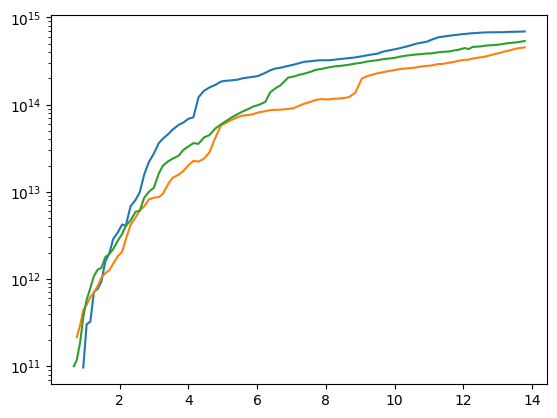

In [116]:
plt.figure()
plt.plot(d1["Age"], d1["MainProgenitorMass"])
plt.plot(d2["Age"], d2["MainProgenitorMass"])
plt.plot(d3["Age"], d3["MainProgenitorMass"])
plt.yscale("log")


plt.show()

In [110]:
cat["totmass"]

array([1.4623428e+15, 7.4588315e+14, 7.1264091e+14, ..., 9.9620782e+10,
       9.9620782e+10, 9.9620782e+10], dtype=float32)